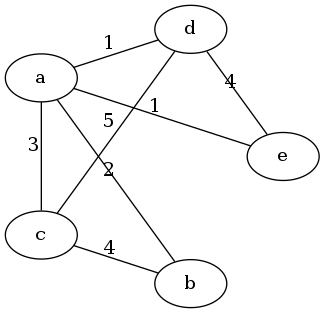

In [1]:
import networkx as nx
import pygraphviz as pgv
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'


G = nx.Graph()
G.add_edges_from([
        ('a', 'b', {'weight':2, 'label': 2}), 
        ('a', 'c', {'weight':3, 'label': 3}), 
        ('a', 'd', {'weight':1, 'label': 1}), 
        ('a', 'e', {'weight':3, 'label': 3}), 
        ('b', 'c', {'weight':4, 'label': 4}), 
        ('c', 'd', {'weight':5, 'label': 5}), 
        ('d', 'e', {'weight':4, 'label': 4}), 
        ('e', 'a', {'weight':1, 'label': 1})
    ])
draw(G, layout='circo')

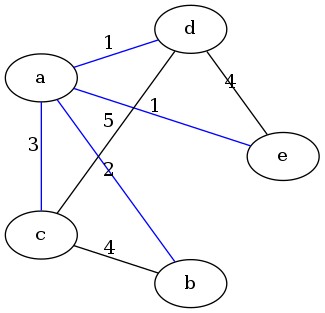

In [2]:
T = nx.minimum_spanning_tree(G)
for e in T.edges():
    G[e[0]][e[1]]['color'] = 'blue'
draw(G, layout='circo')

## New version

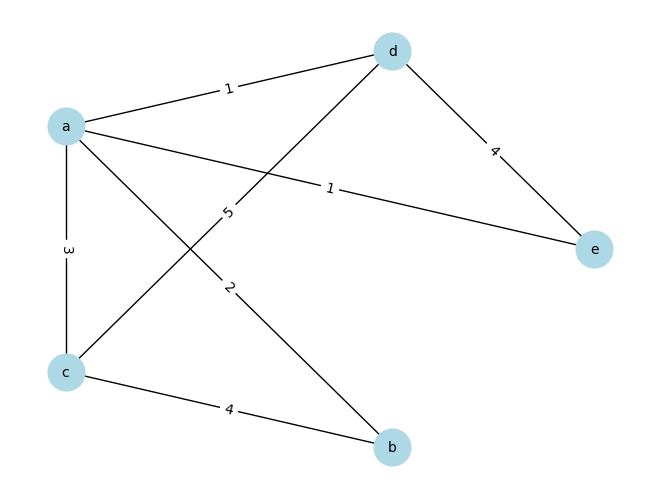

In [2]:
import pygraphviz as pgv
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([
        ('a', 'b', {'weight':2, 'label': 2}), 
        ('a', 'c', {'weight':3, 'label': 3}), 
        ('a', 'd', {'weight':1, 'label': 1}), 
        ('a', 'e', {'weight':3, 'label': 3}), 
        ('b', 'c', {'weight':4, 'label': 4}), 
        ('c', 'd', {'weight':5, 'label': 5}), 
        ('d', 'e', {'weight':4, 'label': 4}), 
        ('e', 'a', {'weight':1, 'label': 1})
    ])

pos = graphviz_layout(G, prog='circo')
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


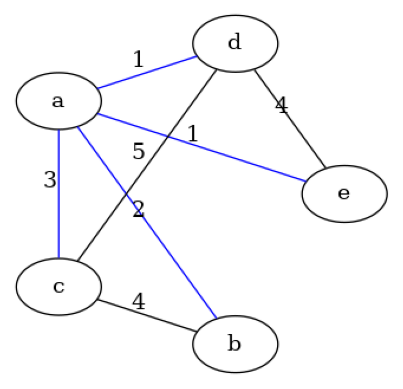

In [7]:
import pygraphviz as pgv
from networkx.drawing.nx_agraph import to_agraph
import networkx as nx
import matplotlib.pyplot as plt

# Compute the minimum spanning tree (MST)
T = nx.minimum_spanning_tree(G)

# Set edge colors: blue for MST edges, black for others
edge_colors = {}
for edge in G.edges(data=True):
    if (edge[0], edge[1]) in T.edges or (edge[1], edge[0]) in T.edges:
        edge_colors[(edge[0], edge[1])] = 'blue'
    else:
        edge_colors[(edge[0], edge[1])] = 'black'

# Convert to AGraph for visualization
A = to_agraph(G)
for edge in edge_colors:
    A.get_edge(edge[0], edge[1]).attr['color'] = edge_colors[edge]

# Draw the graph with circo layout
A.layout('circo')
A.draw('mst_graph.png')
plt.imshow(plt.imread('mst_graph.png'))
plt.axis('off')
plt.show()